# Lecture 2: Linear Regression and Classification 

 **Reading**:   Chapter 3 of *Dive Into Deep Learning*

## Outline

* Linear  regression
* Ridge regression
* Softmax regression for classification


## Linear Regression
- Assumption: The output depends on the inputs linearly.
- Linear model: $y=w_1x_1+w_2x_2+\cdots+w_nx_n +b = \mathbf{w}^T\mathbf{x}+b$
- $w_i$: weights
- $b$: bias



## Basic Elements of Linear Regression


### A simple example
- *Task*: House price prediction
- *Features*: Area, age

### Data 
- *Data set*: house sales for which we know the sale price, area, and age for each home.
  - $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$ and $y^{(i)}, i=1,2,\cdots, n$.

### Linear Model

- The linearity assumption:  the target (price) can be expressed as a weighted sum of the features (area and age):
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$
  - Weights: $w_{\mathrm{area}}$ and $w_{\mathrm{age}}$, influence of each feature on the prediction of target (house price)
  - Bias: $b$ 
  - Affine transformation: a *linear transformation* of features via weighted sum, combined with a *translation* via the added bias.

  
### Objective function/Loss function 
- Goal of Linear Regression: choose the weights and the bias to make the model fit the ovserved data 
- A quality measure for some given model: Least square loss
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$
  - $\hat{y}^{(i)}$: estimate
  - $y^{(i)}$: ground truth

### Illustration with a synthetic example 

![Fit data with a linear model.](../img/fit-linreg.svg)


### Overall loss function

- To measure the quality of a model on the entire dataset of $n$ examples:
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

- Training aims to find parameters ($\mathbf{w}^*, b^*$)
that minimize the total loss across all training examples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### Analytic Solution

- Vectorized loss function $\|\mathbf{y} - \mathbf{X}\mathbf{w}-b\|^2$.
- Taking the derivative of the loss with respect to $\mathbf{w}, b$ and setting it equal to zero yields the analytic (closed-form) solution:
\begin{equation}
\begin{bmatrix} \mathbf{w}^* \\ b^* \end{bmatrix} = (\mathbf{\hat{X}}^\top \mathbf{\hat{X}})^{-1}\mathbf{\hat{X}}^\top \mathbf{y}
\end{equation}

where
$$\mathbf{\hat{X}}=[\mathbf{X}, \mathbf{1}], \mathbf{X} = [\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_n]^T,   \mathbf{y}=[y_1,y_2,\cdots, y_n]^T$$

- What will happen if $\mathbf{\hat{X}}^\top \mathbf{\hat{X}}$ is singular or close to be singular?


## Ridge Regression

- Loss function with regularisations
 $$\|\mathbf{y} - \mathbf{X}\mathbf{w}-b\|^2 + \lambda \left\|\begin{bmatrix} \mathbf{w}^* \\ b^* \end{bmatrix}\right\|^2 $$
- Solution 
\begin{equation}
\begin{bmatrix} \mathbf{w}^* \\ b^* \end{bmatrix} = (\mathbf{\hat{X}}^\top \mathbf{\hat{X}}+\lambda I )^{-1}\mathbf{\hat{X}}^\top \mathbf{y}
\end{equation}
- $\lambda$: regularisation number 

## The Normal Distribution and Squared Loss

-  Linear regression was invented by Gauss in 1795,
-  Connection between the normal distribution and linear regression
-  Normal distribution with mean $\mu$ and variance $\sigma^2$ (standard deviation $\sigma$

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$




In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

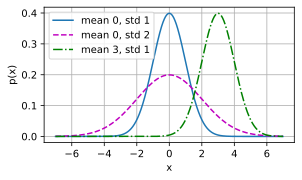

In [2]:
# Use numpy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## Squared loss and maximum likelyhood

- Assume that observations arise from noisy observations, where the noise is normally distributed as follows:

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2).$$

- *Likelihood*
of seeing a particular $y$ for a given $\mathbf{x}$:

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

- To maximize the *likelihood* of the entire dataset:

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

- is equivalent to  minimize the *negative log-likelihood*

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

- Assume that $\sigma$ is some fixed constant. It follows that minimizing the mean squared error is equivalent to maximum likelihood estimation of a linear model under the assumption of additive Gaussian noise.

## Linear Regression Implementation from scrach

- Generate synthetic data
- Reading data
- Initialiization of model parameters
- Defining the model
- Defining the optimization algorithm
- Training
- Estimating errors


In [3]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## Generating the Dataset

- 1000 examples, each consisting of 2 features sampled from a standard normal distribution. $\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.
- True parameters: $\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$,
- Synthetic labels:
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$
-  $\epsilon$ obeys a normal distribution with mean of 0 and standard deviation of 0.01.



In [4]:
def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [5]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

features: tensor([0.5588, 1.1913]) 
label: tensor([1.2690])


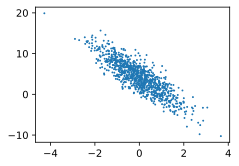

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

### Reading the Data set

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

Read and print
the first small batch of data examples.


In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7963,  1.6869],
        [-0.0184,  1.3216],
        [-2.1510, -0.4632],
        [-0.6909, -0.5088],
        [ 0.3666,  1.2905],
        [ 0.5955, -0.0663],
        [-0.4688, -1.0553],
        [-0.3331,  0.7569],
        [-0.8854,  0.2079],
        [ 0.3953, -0.5062]]) 
 tensor([[-3.1218],
        [-0.3176],
        [ 1.4591],
        [ 4.5303],
        [ 0.5567],
        [ 5.6123],
        [ 6.8407],
        [ 0.9670],
        [ 1.7147],
        [ 6.7012]])




## Initializing Model Parameters

- Initialize weights by sampling random numbers from a normal distribution 
- with mean 0 and a standard deviation of 0.01, and setting the bias to 0.


In [9]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Defining the Model



In [10]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

### Defining the loss function

In [11]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Defining the Optimization Algorithm

In [12]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## Training



* Initialize parameters $(\mathbf{w}, b)$
* Repeat until done
    * Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

- Each *epoch* iteratse through the entire dataset



In [13]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [14]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033450
epoch 2, loss 0.000119
epoch 3, loss 0.000050


### Estimation error

In [15]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([5.6028e-06, 7.1526e-06], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0007], grad_fn=<RsubBackward1>)


## Pytorch Implementation of Linear Regression

### Generating data 

In [16]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

### Reading data

In [17]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)



In [18]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))

[tensor([[ 0.3791,  0.2225],
         [-0.1246,  0.1791],
         [-1.6081, -0.8268],
         [-0.5285, -0.5838],
         [-0.1827, -0.0219],
         [ 1.2972,  0.1972],
         [ 0.8844,  0.0378],
         [-0.7202, -0.0704],
         [-0.3240, -1.5900],
         [-1.0346,  0.5362]]),
 tensor([[4.2170],
         [3.3304],
         [3.7960],
         [5.1374],
         [3.9280],
         [6.1287],
         [5.8430],
         [2.9945],
         [8.9600],
         [0.3130]])]

### Defining the model

In [19]:
# `nn` is an abbreviation for neural networks
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### Initializing Model Parameters

In [20]:
net[0].weight.data.normal_(0, 0.01) 
net[0].bias.data.fill_(0)

tensor([0.])

### Defining the loss function

In [21]:
loss = nn.MSELoss()

### Defining the optimization algorithm

In [22]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## Training

* Generate predictions by calling `net(X)` and calculate the loss `l` (the forward propagation).
* Calculate gradients by running the backpropagation.
* Update the model parameters by invoking our optimizer.

For good measure, we compute the loss after each epoch and print it to monitor progress.

In [23]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000196
epoch 2, loss 0.000106
epoch 3, loss 0.000107


### Estimation Errors

In [24]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-0.0005,  0.0010])
error in estimating b: tensor([-0.0006])


# Softmax Regression for Classification Problem
   
   - Predict categories such as cat, dog and cow.

### Representation of labels.

- Natural ordering $y \in \{1, 2, 3\}$, where the integers represent the classes e.g.  $\{ \text{toddler}, \text{young adult}, \text{adult}\}$
- *One-hot encoding*: a vector with as many components as we have categories. The component corresponding to particular instance's category is set to 1 and all other components are set to 0.
  - For 3-category calssification problem
  $$y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}.$$

## Network Architecture

- Multiple outputs, one per class.
- Multiple linear models, one per class
$$
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}
$$

-  Nural network diagram 
![Softmax regression is a single-layer neural network.](../img/softmaxreg.svg)

- A single-layer neural network.
- Fully connected: $o_1, o_2$, and $o_3$, depends on all inputs, $x_1$, $x_2$, $x_3$, and $x_4$,

## Softmax Operation

- Interpret the outputs of the model as probabilities.
  - Any output $\hat{y}_j$ is interpreted as the probability that a given item belongs to class $j$.
  -  Choose the class with the largest output value as our prediction $\operatorname*{argmax}_j y_j$.
  - The probablities should be non-negative and sum up to 1


- The *softmax function*, invented in 1959 by  R. Duncan Luce. 
$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{where}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}. $$

- For prediction we can pick out the most likely class by

$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

- Although softmax is a nonlinear function, the outputs of softmax regression are still *determined* by an affine transformation of input features; thus, softmax regression is a linear model.

## Loss Function

- Measure the quality of the predicted probabilities.
- Maximum likelihood estimation,
- Cross-Entropy Loss
$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$
- $\hat{y}_j$: predicted probability
- $y_j$: ground truth, the $j$th element of the one-hot encoding

### Softmax and Derivatives


$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

- The derivative is the difference between the probability assigned by the model and elements in the one-hot label vector.
- Similar to what happens in regression, where the gradient was the difference between the observation $y$ and estimate $\hat{y}$.




## Implementation of Softmax Regression

In [25]:
import torch
from torch import nn
from d2l import torch as d2l

### Download the data set - Fashion MNIST

In [26]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

### Defining the Model and  Initializing Model Parameters

In [27]:
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

### Definining the loss function

In [28]:
loss = nn.CrossEntropyLoss()

### Defining the optimization algorithm

In [29]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

### Training

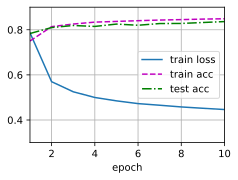

In [30]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)